<a href="https://colab.research.google.com/github/SungHunYang/AI_Project/blob/main/writeMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [44]:
mnist = keras.datasets.mnist

(train_datas, train_labels), (test_datas, test_labels) = mnist.load_data()

In [45]:
print(train_dates.shape)
print(test_datas.shape)

(60000, 28, 28)
(10000, 28, 28)


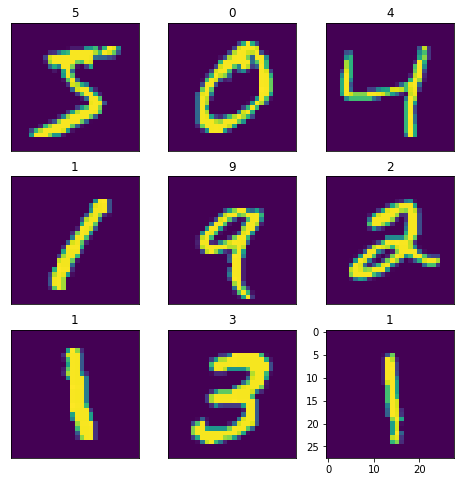

In [46]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3,3,i+1)
  plt.imshow(train_datas[i])
  plt.title(train_labels[i])
plt.show()

In [47]:
train_datas = train_datas / 255.
test_datas = test_datas / 255.
#train_labels = keras.utils.to_categorical(train_labels, 10)
#test_labels = keras.utils.to_categorical(test_labels, 10)

Featrue batch shape : (64, 28, 28)
labels batch shape : (64,)
tf.Tensor(
[8 4 2 9 9 6 1 2 9 0 1 8 5 0 7 4 7 3 9 0 0 7 4 8 7 8 3 1 2 4 8 6 5 6 4 4 0
 8 7 1 2 5 0 6 8 7 8 8 1 3 8 3 4 1 4 7 5 3 5 0 6 2 2 6], shape=(64,), dtype=uint8)


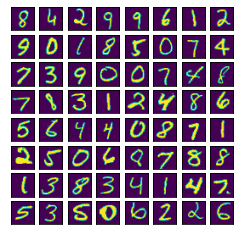

In [48]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_datas, train_labels)).shuffle(buffer_size=100000).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((test_datas, test_labels)).batch(64)
# 64개의 데이터 묶음이 된다. tensor가 아니라 shape도 안됨

images, lbs = next(iter(train_dataset))  # iterable하게 보는 방법뿐
print(f"Featrue batch shape : {images.shape}")
print(f"labels batch shape : {lbs.shape}")
# print(lbs)
plt.figure(figsize=(4,4))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(images[i])

In [49]:
def testModel():
  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(units = 100, activation='relu'))
  model.add(keras.layers.Dense(units=10, activation='softmax'))
  return model

In [51]:
P_model = testModel()
learning_rate = 0.001
P_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate),loss ='sparse_categorical_crossentropy',metrics=['accuracy'])
# label을 one_hot 안했기 때문에 categorical_crossentropy 말고, sparse_categorical_crossentropy로 해야 한다.
history = P_model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.3176 - accuracy: 0.9125 - val_loss: 0.1720 - val_accuracy: 0.9499
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1452 - accuracy: 0.9585 - val_loss: 0.1283 - val_accuracy: 0.9608
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1057 - accuracy: 0.9687 - val_loss: 0.1043 - val_accuracy: 0.9688
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0806 - accuracy: 0.9768 - val_loss: 0.0972 - val_accuracy: 0.9690
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0644 - accuracy: 0.9809 - val_loss: 0.0821 - val_accuracy: 0.9738
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0533 - accuracy: 0.9838 - val_loss: 0.0803 - val_accuracy: 0.9747
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0436 - accuracy: 0.9870 - val_loss: 0.0718 - val_accuracy: 0.9751
Epoch 

In [52]:
P_model.evaluate(test_dataset)

157/157 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9771


[0.07326532900333405, 0.9771000146865845]

Saving number4.png to number4 (1).png
User uploaded file "number4.png with length 470 bytes


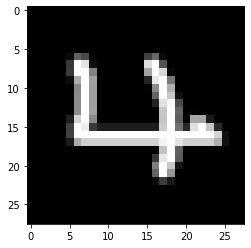

In [54]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name} with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'number4.png')
# image file 읽기
cur_img = Image.open(img_path)
# 28X28로 resize
cur_img = cur_img.resize((28,28))
image = np.asarray(cur_img)

# color image 일 경우 RGB 평균값으로 gray scale로 변경
try:
  image = np.mean(image, axis=2)
except:
  pass
# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image) # 반전
# MNIST와 동일하게 data preprocessing
image = image / 255.

plt.imshow(image, cmap ='gray')
plt.show()

In [57]:
image = np.reshape(image, (1,28,28)) # image를 28X28 에서 train했던 데이터와 같은 shape으로 바꿔준다 (3차원)
print(P_model.predict(image))

print("예측 값은 {} 입니다.".format(np.argmax(P_model.predict(image),-1)))

[[1.00133354e-06 2.37907749e-10 4.69934321e-06 1.53666786e-08
  9.99637246e-01 4.50152733e-08 8.16494889e-07 3.56195116e-04
  1.04290795e-11 4.88914900e-08]]
예측 값은 [4] 입니다.
